Grafos
======

**Autor:** Daniel R. Cassar



## Breve introdução sobre grafos



Grafo é uma estrutura matemática que usamos para representar um conjunto de objetos e eventuais conexões entre eles. Os objetos que compõe um grafo são chamados de **vértices** ou **nós** e as conexões entre estes objetos são chamadas de **arestas** ou **elos**. Quando dois vértices são conectados por uma aresta, chamamos eles de **vizinhos**.

Abaixo temos um exemplo de um grafo. Os vértices deste grafo são o conjunto $\{1, 2, 3, 4, 5, 6\}$. Estes vértices estão conectados entre si por arestas, por exemplo: o vértice $1$ está conectado aos vértices $5$ e $2$ e o vértice $6$ está conectado apenas ao vértice $4$.

![img](https://upload.wikimedia.org/wikipedia/commons/5/5b/6n-graf.svg)

Grafos são estruturas matemáticas muito importantes. Diversos problemas podem ser representados por grafos. O grafo da imagem anterior, por exemplo, poderia representar linhas de ônibus que conectam diferentes cidades. Neste caso, se estamos na cidade $2$ sabemos que podemos chegar até as cidades $5$, $3$ e $1$ se pegarmos o ônibus correto, mas não conseguimos chegar até a cidade $6$ com apenas um ônibus. Neste caso, precisamos primeiro ir até as cidades $5$ ou $3$, pegar um segundo ônibus para a cidade $4$ e finalmente um terceiro ônibus para a cidade $6$.

Este grafo da figura anterior é relativamente simples (afinal, ele contém poucos vértices e poucas arestas). Conseguimos visualmente planejar nossa rota de ônibus apenas olhando para o grafo. Porém, o que fazer quando temos um grafo com muitos vértices e muitas arestas? Neste caso, não é tão fácil identificar um caminho possível. Para resolver este problema e os demais problemas relacionados a grafos nós utilizamos *algoritmos de grafos*.



## Exemplos de coisas/conceitos que podem ser representadas por grafos



-   Internet
-   Redes sociais
-   Malha rodoviária
-   Ciclos ecológicos
-   Circuitos elétricos
-   Expressões matemáticas
-   Árvores de decisão
-   Redes neurais (naturais e artificiais)
-   Moléculas, estruturas cristalinas e microestruturas de materiais



## Estrutura de dados para representar um grafo



Existem diversas maneiras de representar um grafo usando estruturas de dados de Python. A proposta deste notebook é de usar dicionários para representar grafos. Esta proposta se baseia no fato de que dicionários são capazes de relacionar dois objetos entre si (através da estrutura chave-valor). Desta forma, podemos usar chaves para indicar os vértices de um grafo e seus respectivos valores para indicar arestas que saem destes vértices.

Vamos criar um dicionário que represente o grafo da imagem abaixo.

![img](https://upload.wikimedia.org/wikipedia/commons/5/5b/6n-graf.svg)



In [2]:
grafo = {
    5: [4, 2, 1],
    2: [1, 5, 3],
    1: [2, 5],
    3: [2, 4],
    4: [3, 5, 6],
    6: [4],
}

Se preenchido corretamente, nosso dicionário `grafo` está armazenando todas as informações que temos na imagem, sem perda. Agora podemos fazer perguntas para a estrutura de dados que criamos. Digamos que estou na cidade $4$ e quero saber quais cidades eu consigo acessar pegando apenas um ônibus. Essa resposta é bastante direta, basta checar os valores da chave em questão:



In [ ]:
print("Da cidade 4 eu posso pegar um ônibus e chegar nas cidades", grafo[4])

Se fizemos o grafo corretamente, observamos que podemos ir até as cidades $3$, $5$ ou $6$ usando transporte coletivo partindo da cidade $4$.

Quem sabe a notação acima possa parecer um pouco confusa, quando eu escrevo `grafo[4]` neste caso eu não estou recuperando o elemento de índice `4` do dicionário, mas sim o valor relacionado a chave `4` do dicionário `grafo`. Lembre-se: listas trabalham com índice e dicionários trabalham com chaves.

Você pode checar que a frase acima é verdade tentando rodar `grafo[0]` que vai resultar em um erro pois não existe a chave `0` nesse dicionário.

Antes de seguir em frente, vamos representar graficamente o grafo criado! Para isso usaremos a biblioteca `networkx` que é especializada em grafos.



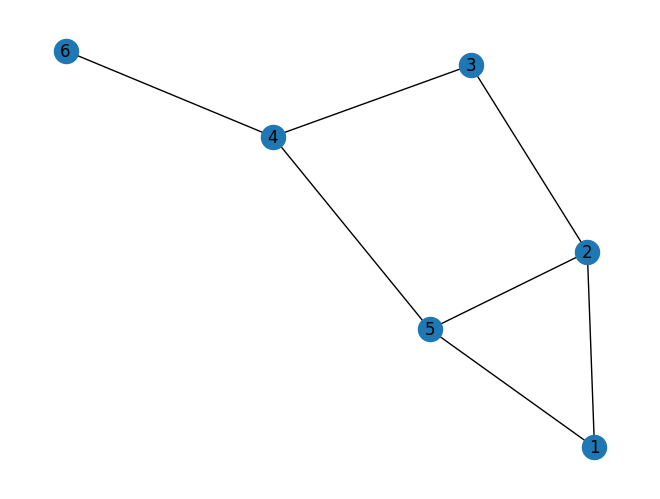

In [4]:
from networkx import Graph, draw

g = Graph(grafo)

draw(g, with_labels=True)

### Breve pausa



Antes de seguir em frente, observe como funciona o método `get` de dicionários. Isso será utilizado no futuro. Teste alterar o valor de `chave_desejada` para algo que não seja uma chave do dicionário.



In [ ]:
dicionario = {
    "Álgebra Linear": "Linguagens matemáticas",
    "Fundamentos da Matéria": "Ciência da matéria",
    "Forma, Função e Informação": "Ciência da vida",
    "Práticas em Ciência de Dados": "Atividades práticas",
    "Ciência Moderna": "Humanidades",
    "Termodinâmica": "Ciência da matéria",
}

chave_desejada = "Álgebra Linear"
valor_caso_nao_exista = "Indeterminado"

dicionario.get(chave_desejada, valor_caso_nao_exista)

## Exercícios



### Identificando os caminhos até a cidade $n$



**Problema**: encontrar todas as cidades que levam até a cidade `n`.

**Entradas**:

1.  um grafo representado por um dicionário
2.  a cidade `n`

**Saída**: lista contendo todas as cidades que levam até a cidade `n`.

**Algoritmo**:



In [5]:
def encontra_cidades(grafo, n):
    """Encontra todas as cidades que levam até a cidade n."""
    resposta = []
    
    for chave, valor in grafo.items():
        if n in valor:
            resposta.append(chave)

    return resposta

**Teste**:



In [6]:
for n in grafo:
    print("Você pode chegar na cidade", n,
          "saindo das cidades", encontra_cidades(grafo, n))

Você pode chegar na cidade 5 saindo das cidades [2, 1, 4]
Você pode chegar na cidade 2 saindo das cidades [5, 1, 3]
Você pode chegar na cidade 1 saindo das cidades [5, 2]
Você pode chegar na cidade 3 saindo das cidades [2, 4]
Você pode chegar na cidade 4 saindo das cidades [5, 3, 6]
Você pode chegar na cidade 6 saindo das cidades [4]


### Viajando com no máximo dois ônibus



**Problema**: listar todas as cidades que eu posso visitar partindo da cidade `n` pegando no máximo dois ônibus.

**Entradas**:

1.  um grafo representado por um dicionário
2.  a cidade `n`

**Saída**: lista contendo todas as cidades que eu posso visitar partindo da cidade `n` pegando no máximo dois ônibus (não pode haver repetição de cidades nesta lista).

**Algoritmo**:



In [11]:
def dois_busoes(grafo, n):
    """Calcula todas as cidades que podem ser visitadas com dois ônibus ou menos a partir de n"""

    resposta = []

    if n in grafo:
        resposta.append(n)

        cidades_1_busao = grafo[n]
        resposta.extend(cidades_1_busao)

        for cidade in cidades_1_busao:
            resposta.extend(grafo[cidade])
            #resposta.extend(grafo.get(cidade, []))

        resposta = list(set(resposta))

        return resposta
    else:
        return [n]

    

**Teste**:



In [10]:
for n in grafo:
    print("Saindo da cidade", n,
          "com no máximo 2 ônibus você pode visitar as cidades",
          dois_busoes(grafo,n))

Saindo da cidade 5 com no máximo 2 ônibus você pode visitar as cidades [1, 2, 3, 4, 5, 6]
Saindo da cidade 2 com no máximo 2 ônibus você pode visitar as cidades [1, 2, 3, 4, 5]
Saindo da cidade 1 com no máximo 2 ônibus você pode visitar as cidades [1, 2, 3, 4, 5]
Saindo da cidade 3 com no máximo 2 ônibus você pode visitar as cidades [1, 2, 3, 4, 5, 6]
Saindo da cidade 4 com no máximo 2 ônibus você pode visitar as cidades [1, 2, 3, 4, 5, 6]
Saindo da cidade 6 com no máximo 2 ônibus você pode visitar as cidades [3, 4, 5, 6]


## Um pouco de história



> &ldquo;É possível atravessar por todas as pontes de Königsberg sem passar duas vezes na mesma ponte, retornando ao ponto de partida?&rdquo;



Essa é uma pergunta famosa que foi resolvida por Leonhard Euler em 1736, dando origem à teoria dos grafos [1].

![img](https://upload.wikimedia.org/wikipedia/commons/5/5b/Pontes_K%C3%B6nigsberg.JPG)



## XKCD relevante



![img](https://imgs.xkcd.com/comics/konigsberg.png)

`Imagem: Königsberg (XKCD) disponível em https://xkcd.com/2694`



## Referências



1.  Artigo da Wikipédia sobre as sete pontes de Königsberg [https://pt.wikipedia.org/wiki/Sete_pontes_de_K%C3%B6nigsberg](https://pt.wikipedia.org/wiki/Sete_pontes_de_K%C3%B6nigsberg)

